In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento de modelos de prueba
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Imputación de valores
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# Escala de valores
from sklearn.preprocessing import StandardScaler

In [2]:
DATASET_PATH = '../data/imputed_data.csv'
TRAIN_DATASET_PATH = '../data/train_df.csv'
TEST_DATASET_PATH = '../data/test_df.csv'

In [3]:
FEATURES = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes',  'Turbidity']

TARGET = "Potability"

In [4]:
df = pd.read_csv(DATASET_PATH)
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [5]:
# Eliminar la primera columna
train_df = train_df.drop(train_df.columns[0], axis=1)
test_df = test_df.drop(test_df.columns[0], axis=1)

In [6]:
X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test = test_df[FEATURES]
y_test = test_df[TARGET]

In [19]:
def model_results(X_test, y_test, model, title):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    RocCurveDisplay.from_estimator(model, X_test, y_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=model.classes_
    )

    fig, ax = plt.subplots(figsize=(6,6))
    ax.grid(False)
    disp.plot(ax=ax)
    ax.set_title(f"Confusion Matrix - {title}")
    

## Regresion Logistica (Base line)

In [7]:
classifier_balance = LogisticRegression(random_state = 0, class_weight="balanced")
classifier_balance.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

              precision    recall  f1-score   support

         0.0       0.61      0.53      0.57       499
         1.0       0.39      0.47      0.43       320

    accuracy                           0.51       819
   macro avg       0.50      0.50      0.50       819
weighted avg       0.53      0.51      0.51       819



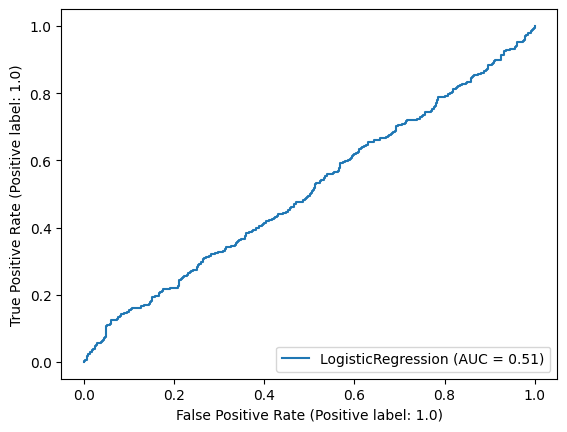

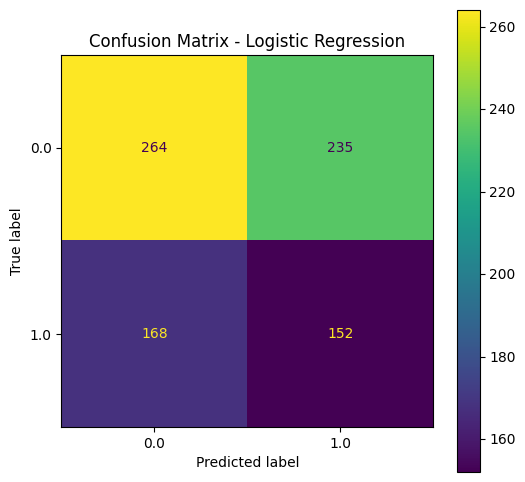

In [20]:
model_results(X_test, y_test, classifier_balance, 'Logistic Regression')

## Otros Modelos

### Support Vector Machine

In [13]:
from sklearn.svm import SVC
svm_potability = SVC()

grid = GridSearchCV(
    svm_potability,
    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
        {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"]},
        {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
    refit=True,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
             scoring='accuracy')

In [31]:
print(f"Best Estimator: {grid.best_params_} , Best Score : {grid.best_score_}")

Best Estimator: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'} , Best Score : 0.6849874985511566


In [24]:
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86       499
         1.0       0.93      0.57      0.70       320

    accuracy                           0.81       819
   macro avg       0.85      0.77      0.78       819
weighted avg       0.84      0.81      0.80       819



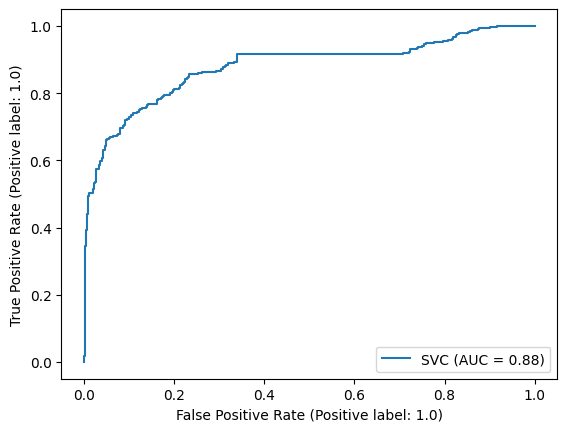

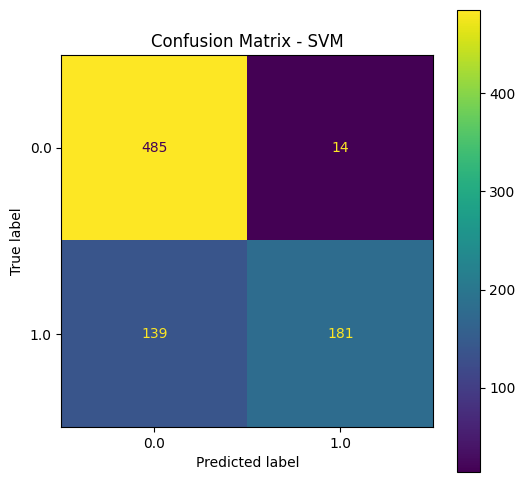

In [25]:
model_results(X_test, y_test, best_svm, 'SVM')

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

param={
    'max_depth': [30,40,50,60,70,80,90]
}

RFC_grid=GridSearchCV(
    RandomForestClassifier(),
    param_grid=param,
    cv=5,
    scoring='accuracy'
)
RFC_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 40, 50, 60, 70, 80, 90]},
             scoring='accuracy')

In [32]:
print(f"Best Estimator: {RFC_grid.best_params_} , Best Score : {RFC_grid.best_score_}")

Best Estimator: {'max_depth': 40} , Best Score : 0.6768516218767074


In [33]:
best_RFC = RFC_grid.best_estimator_
y_pred = best_RFC.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75       499
         1.0       0.60      0.33      0.42       320

    accuracy                           0.65       819
   macro avg       0.63      0.59      0.59       819
weighted avg       0.64      0.65      0.62       819



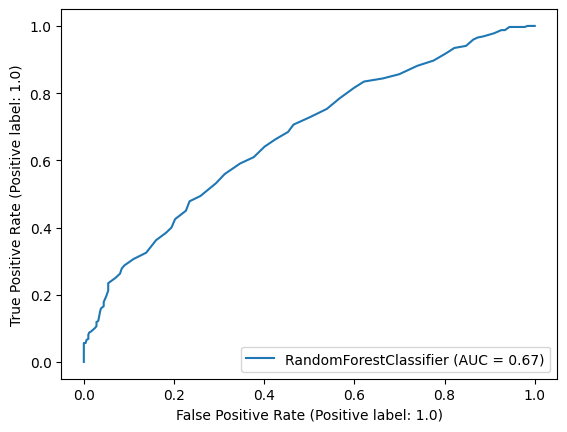

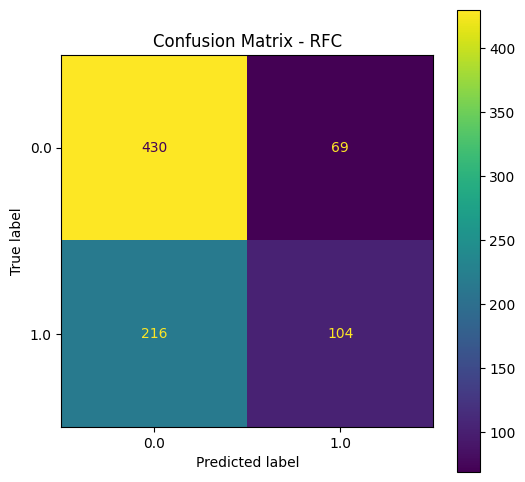

In [35]:
model_results(X_test, y_test, best_RFC, 'RFC')

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

param={
    'n_neighbors': [1,3,5,10,15,20,40,45,50,60,70,100]
}
KNN_grid=GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param,
    cv=5,
    scoring='accuracy'
)
KNN_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 20, 40, 45, 50, 60,
                                         70, 100]},
             scoring='accuracy')

In [37]:
best_KNN = KNN_grid.best_estimator_
y_pred = best_KNN.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.65      0.93      0.76       499
         1.0       0.65      0.21      0.32       320

    accuracy                           0.65       819
   macro avg       0.65      0.57      0.54       819
weighted avg       0.65      0.65      0.59       819



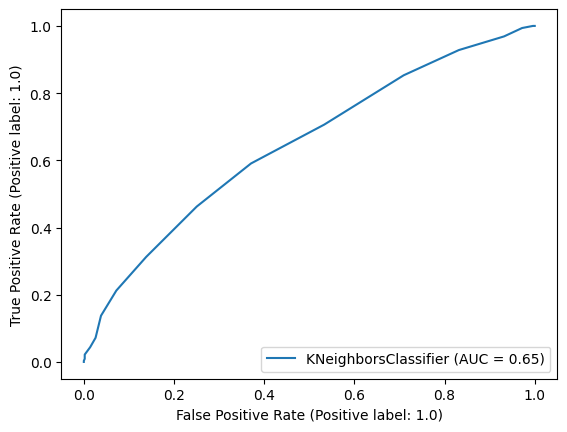

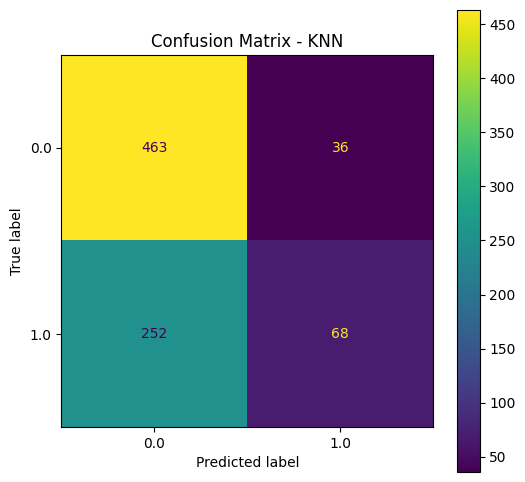

In [38]:
model_results(X_test, y_test, best_KNN, 'KNN')

In [40]:
print(f"Best Estimator: {KNN_grid.best_params_} , Best Score : {KNN_grid.best_score_}")

Best Estimator: {'n_neighbors': 20} , Best Score : 0.652419982448297
